# About 2 Million Members Age and Gender Distribution Analysis

Author: Ryan Xu

# Background
The organization in Shanghai has about 2 million members, and this analysis will reveal their age and gender distribution.

For confidentiality reasons, sensitive information was deleted from the original version produced in 2022, anthishe report was re-produced in June 2024.

# 1. import modules

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import datetime

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

# 2. Data Preparation
## 2.1 Read csv file

In [33]:
# read the original csv file to df_all
columns = ['id', 'sex', 'id_card_num']
df_all=pd.read_csv('shanghai-XXX-member-ch-en.csv',sep='\t', usecols=columns, low_memory=False)
print(df_all.shape)
print(df_all.info())

(1956731, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956731 entries, 0 to 1956730
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   id           int64 
 1   sex          object
 2   id_card_num  object
dtypes: int64(1), object(2)
memory usage: 44.8+ MB
None


In [34]:
# clean the data: id_card_num == NaN, save to df3
print(df_all.isna().sum())
print('df_all shape: ',df_all.shape,'\n')

id                 0
sex                0
id_card_num    21072
dtype: int64
df_all shape:  (1956731, 3) 



## 2.2 Clean date: dropna

In [61]:
df_noMissing = df_all.dropna(subset=['id_card_num'])
print('df_noMissing shape: ',df_noMissing.shape)

df_noMissing shape:  (1935659, 3)


## 2.3 Data Validation

There's no Age column in the dataset but it can be extracted from "id_card_num", normally the "id_card_num" is like this "310119200112310131", a total of 18 digits, of which the 7th to 14th digits, here "20011231", represent the date of birth.

However, we need to consider the possibility of input errors, so we need to verify the birthday.

In [96]:
# Define the function to check date String
def isValidDate(datestr):
    if len(datestr) != 8 or not datestr.isdigit():
        return False
    try:
        # Extract year, month, and day from datestr
        year = int(datestr[0:4])
        month = int(datestr[4:6])
        day = int(datestr[6:])

        # Check if the year is within a reasonable range for birthdates
        # current_year = date.today().year
        current_year = 2021 # The data is get in 2021
        if year < 1920 or year > current_year:
            return False

        # Try to format the date string into the standard format of 'YYYY-MM-DD'
        datestr = f"{year:04d}-{month:02d}-{day:02d}"

        # Convert the string to a date object to ensure it is a valid date
        date.fromisoformat(datestr)
        # print(f"Valid date: {datestr}")
        return True
    except ValueError:
        # print(f"Invalid date: {datestr}")
        return False

In [97]:
# extract date of birth from "id_card_num"
df_noMissing['dob'] = df_noMissing['id_card_num'].str.slice(6,14)

# For secret reason delete the 'id_card_num'
df_noMissing_dob = df_noMissing.drop(['id_card_num'],axis=1)
df_noMissing_dob.head()

,id,sex,dob
0,1,女(Female),19830508
1,2,男(male),19531029
2,3,男(male),19290408
3,4,女(Female),19740109
4,5,男(male),19421220


In [24]:
# import swifter to speed
import swifter

In [98]:
# if no swifter the calculate time is about 1 min, but with it only several seconds!
ageCheck = df_noMissing_dob['dob'].swifter.apply(lambda x: isValidDate(x))
df_noMissing_dob['ageCheck'] = ageCheck
df_noMissing_dob.head()

Pandas Apply:   0%|          | 0/1935659 [00:00<?, ?it/s]

,id,sex,dob,ageCheck
0,1,女(Female),19830508,True
1,2,男(male),19531029,True
2,3,男(male),19290408,True
3,4,女(Female),19740109,True
4,5,男(male),19421220,True


In [99]:
print('df_noMissing_dob shape: ', df_noMissing_dob.shape)
print(df_noMissing_dob['ageCheck'].value_counts())
df_noMissing_dob[df_noMissing_dob['ageCheck'] == False].head()

df_noMissing_dob shape:  (1935659, 4)
ageCheck
True     1916363
False      19296
Name: count, dtype: int64


,id,sex,dob,ageCheck
173,174,男(male),09550908,False
364,365,女(Female),,False
784,785,女(Female),,False
1926,1927,男(male),,False
3202,3203,女(Female),19170315,False


In [104]:
# Drop the rows that without valid age
df_noMissing_validAge = df_noMissing_dob[df_noMissing_dob['ageCheck']]
print('df_noMissing_validAge shape: ', df_noMissing_validAge.shape)
df_noMissing_validAge.head()

df_noMissing_validAge shape:  (1916363, 4)


,id,sex,dob,ageCheck
0,1,女(Female),19830508,True
1,2,男(male),19531029,True
2,3,男(male),19290408,True
3,4,女(Female),19740109,True
4,5,男(male),19421220,True


## 2.4 Data Construction

Create the "age" column as the validated "dob", date of birth.

In [105]:
if set('age').issubset(df_noMissing_validAge.columns):
    df_noMissing_validAge.drop(['age'],axis=1,inplace=True)
    
df_noMissing_validAge['BirthYear'] = df_noMissing_validAge['dob'].str.slice(0,4).astype(int)

# the year was 2021
# df_noMissing_validAge['age'] = datetime.datetime.now().year - df_noMissing_validAge['BirthYear'] 
df_noMissing_validAge['age'] = 2021 - df_noMissing_validAge['BirthYear'] 
df_noMissing_validAge.drop(columns='ageCheck',inplace=True)
print(df_noMissing_validAge.info())
print('df_noMissing_validAge shape: ', df_noMissing_validAge.shape)
df_noMissing_validAge.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1916363 entries, 0 to 1956730
Data columns (total 5 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   id         int64 
 1   sex        object
 2   dob        object
 3   BirthYear  int32 
 4   age        int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 73.1+ MB
None
df_noMissing_validAge shape:  (1916363, 5)


,id,sex,dob,BirthYear,age
0,1,女(Female),19830508,1983,38
1,2,男(male),19531029,1953,68
2,3,男(male),19290408,1929,92
3,4,女(Female),19740109,1974,47
4,5,男(male),19421220,1942,79


In [106]:
# Display the describe output without scientific notation
with pd.option_context('display.float_format', '{:.2f}'.format):
    print(df_noMissing_validAge['age'].describe())

count   1916363.00
mean         57.13
std          18.45
min          15.00
25%          40.00
50%          58.00
75%          71.00
max         101.00
Name: age, dtype: float64


# 3. Age Distribution
## 3.1 plot the "Date of Birth(Year)"

<Figure size 640x480 with 0 Axes>

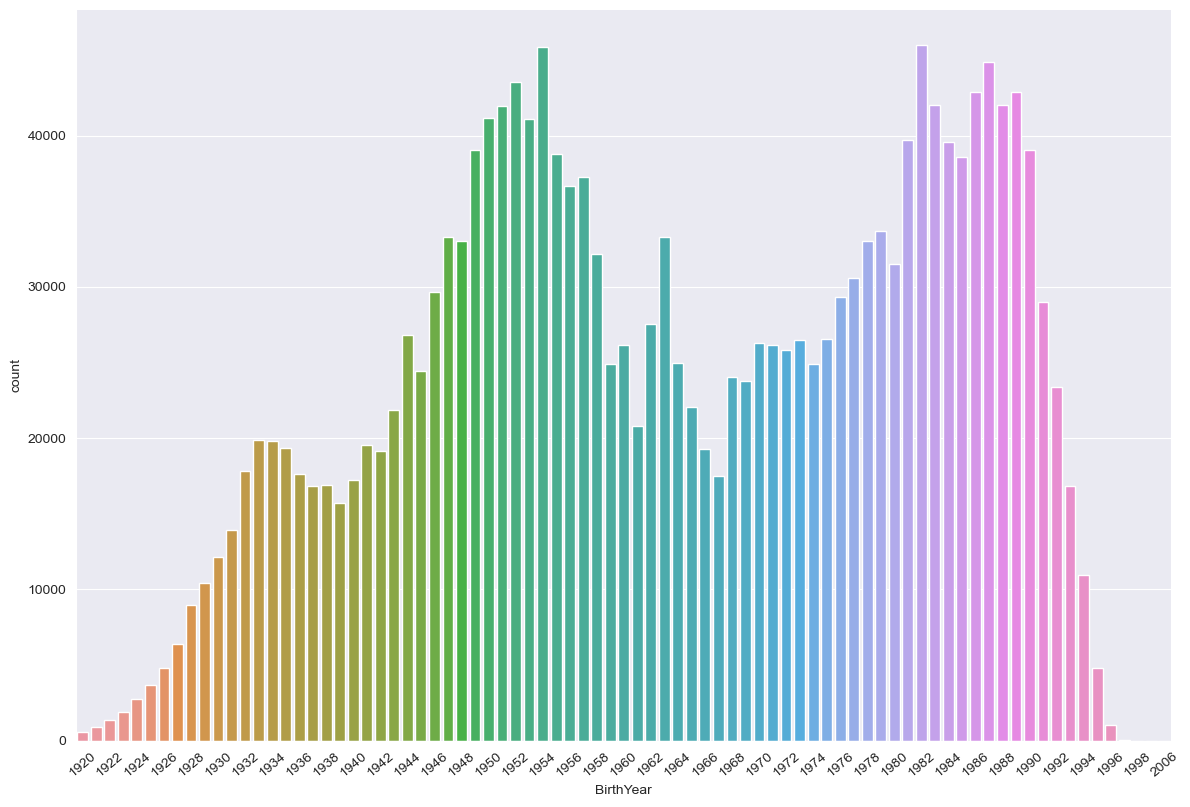

In [107]:
# customer the plot
# colors = ["#FF0B04", "#4374B3"]
plt.clf()
sns.set_palette(sns.color_palette('rocket'))

#plt.figure(figsize=(12,8))
g1 = sns.catplot(x='BirthYear', data = df_noMissing_validAge[['BirthYear']], kind ='count', height=8, aspect=1.5)
g1.set_xticklabels(step=2,rotation=40)
plt.show()

# 4 Age & Gender Distribution
## 4.1 clean data: `sex` column

In [108]:
# Check if there are NaN data in sex column
df_noMissing_validAge.isna().sum()

id           0
sex          0
dob          0
BirthYear    0
age          0
dtype: int64

In [109]:
# Check the sex value kind
print(df_noMissing_validAge['sex'].value_counts())
df_genderGroupByAge = df_noMissing_validAge[['sex','age']].groupby('age').value_counts()
df_genderGroupByAge = df_genderGroupByAge.reset_index()
print(type(df_genderGroupByAge))
df_genderGroupByAge

sex
男(male)      1203483
女(Female)     712880
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>


,age,sex,count
0,15,男(male),1
1,22,男(male),1
2,23,女(Female),1
3,24,女(Female),40
4,24,男(male),27
...,...,...,...
154,99,女(Female),438
155,100,男(male),580
156,100,女(Female),297
157,101,男(male),391


In [110]:
df_genderGroupByAge.columns

Index(['age', 'sex', 'count'], dtype='object')

## 4.2 plot the age and gender

In [114]:
import matplotlib

# Set the font to a font that supports Chinese characters
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # Use 'MS Gothic' for Windows

# Ensure that negative values are displayed correctly
matplotlib.rcParams['axes.unicode_minus'] = False

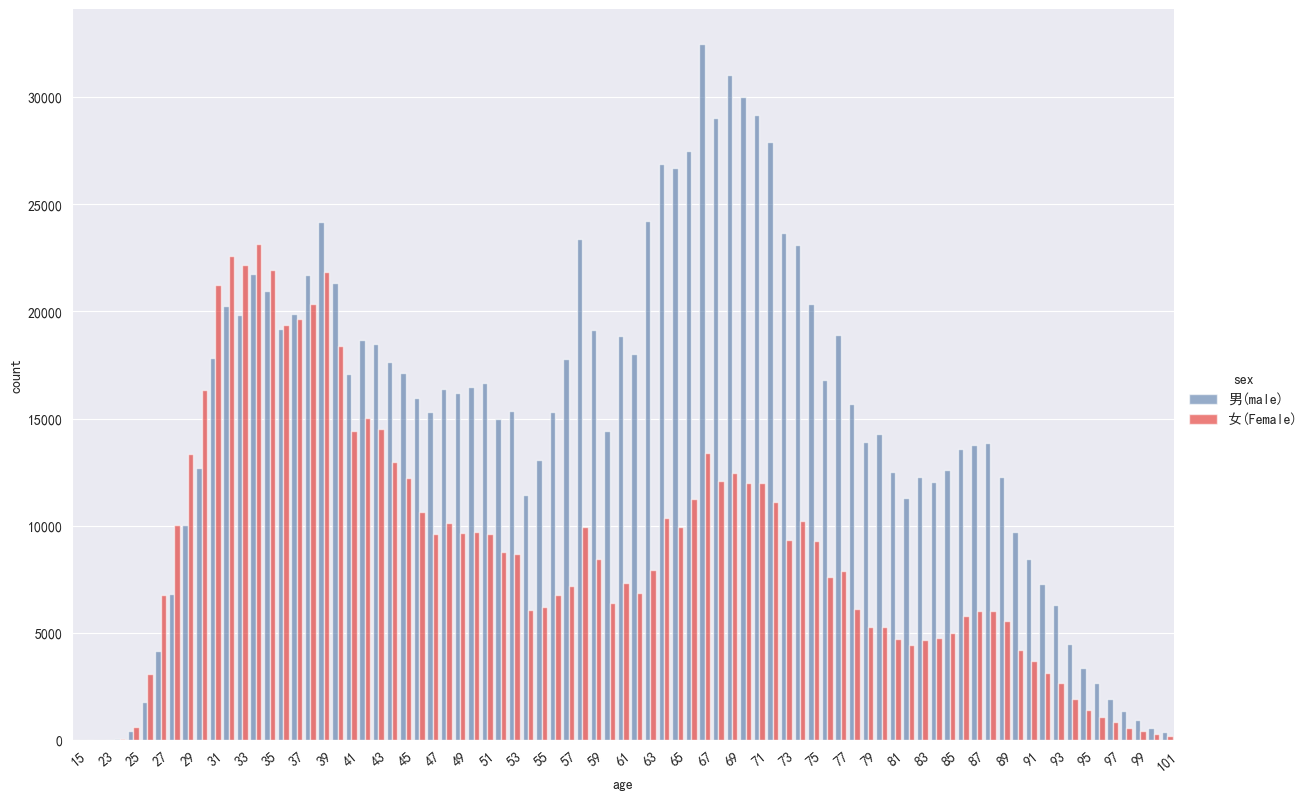

In [115]:
# customer the plot
colors = ["#4374B3","#FF0B04"]
#sns.set_palette(sns.color_palette('RdBu'))
sns.set_palette(sns.color_palette(colors))

g2 = sns.catplot(data=df_genderGroupByAge,
                 kind='bar',
                 x='age',
                 y='count',
                 hue='sex',
                 ci='sd',
                 alpha=0.6,
                 height=8, 
                 aspect=1.5)
g2.set_xticklabels(step=2, rotation=40)
# g2.legend()
plt.show()

In [116]:
print(df_noMissing_validAge['sex'].value_counts())

sex
男(male)      1203483
女(Female)     712880
Name: count, dtype: int64


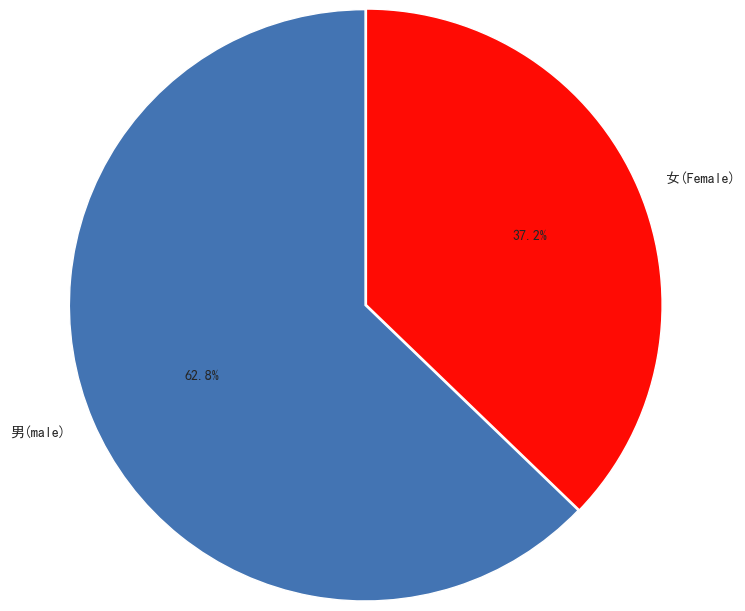

In [117]:
# male vs female
g3 = plt.pie(df_noMissing_validAge['sex'].value_counts(),
             labels=df_noMissing_validAge['sex'].value_counts().index,
             autopct='%.1f%%',  #Display the percentage
             startangle=90,
             explode=[0, 0.01],
             colors=["#4374B3","#FF0B04"],
             radius = 2)
plt.show()

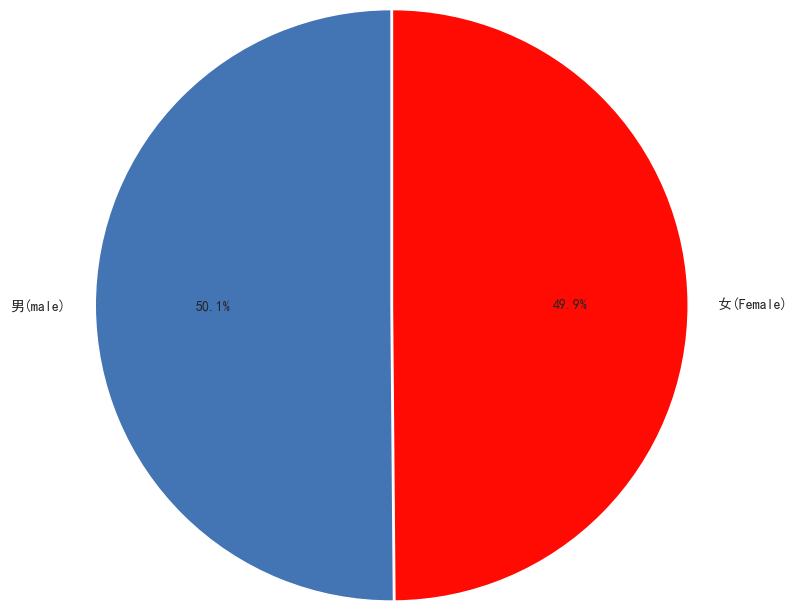

In [120]:
# male vs female age is <= 45 
df_noMissing_validAge_less45 = df_noMissing_validAge[df_noMissing_validAge['age']<=45]['sex'].value_counts()
g3 = plt.pie([df_noMissing_validAge_less45['男(male)'], df_noMissing_validAge_less45['女(Female)']],
             labels=['男(male)','女(Female)'],
             autopct='%.1f%%',  # Display the percentage
             startangle=90,
             explode=[0,0.01],
             colors=["#4374B3","#FF0B04"],
             radius = 2)
plt.show()

In [121]:
male_total = df_noMissing_validAge['sex'].value_counts()['男(male)']
female_total = df_noMissing_validAge['sex'].value_counts()['女(Female)']
member_total = male_total + female_total

print(f"Male Total: {male_total}")
print(f"Female Total: {female_total}")
print(f"Member Total: {member_total}")

Male Total: 1203483
Female Total: 712880
Member Total: 1916363


In [123]:
# Binning as the age
age_band=[14,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110]
df_genderGroupByAge['bins']=pd.cut(df_genderGroupByAge['age'], bins=age_band)
df_genderGroupByAge

,age,sex,count,bins
0,15,男(male),1,"(14, 20]"
1,22,男(male),1,"(20, 25]"
2,23,女(Female),1,"(20, 25]"
3,24,女(Female),40,"(20, 25]"
4,24,男(male),27,"(20, 25]"
...,...,...,...,...
154,99,女(Female),438,"(95, 100]"
155,100,男(male),580,"(95, 100]"
156,100,女(Female),297,"(95, 100]"
157,101,男(male),391,"(100, 105]"


In [124]:
orders = df_genderGroupByAge['bins'].unique()
print(type(orders))
print(orders,'\n')
print(orders[::-1])

<class 'pandas.core.arrays.categorical.Categorical'>
[(14, 20], (20, 25], (25, 30], (30, 35], (35, 40], ..., (80, 85], (85, 90], (90, 95], (95, 100], (100, 105]]
Length: 18
Categories (19, interval[int64, right]): [(14, 20] < (20, 25] < (25, 30] < (30, 35] ... (90, 95] < (95, 100] < (100, 105] < (105, 110]] 

[(100, 105], (95, 100], (90, 95], (85, 90], (80, 85], ..., (35, 40], (30, 35], (25, 30], (20, 25], (14, 20]]
Length: 18
Categories (19, interval[int64, right]): [(14, 20] < (20, 25] < (25, 30] < (30, 35] ... (90, 95] < (95, 100] < (100, 105] < (105, 110]]


In [125]:
# get the female band with number and percentage
df_bins_female=df_genderGroupByAge[df_genderGroupByAge['sex']=='女(Female)'].groupby('bins',as_index=False).agg({'count':'sum'})
df_bins_female['preportion'] = df_bins_female['count'] /df_bins_female['count'].sum()
print(df_bins_female.head(),'\n')

# get the male band with number and percentage
df_bins_male=df_genderGroupByAge[df_genderGroupByAge['sex']=='男(male)'].groupby('bins',as_index=False).agg({'count':'sum'})
df_bins_male['preportion'] = df_bins_male['count'] /df_bins_male['count'].sum()
print(df_bins_male.head())

       bins   count  preportion
0  (14, 20]       0    0.000000
1  (20, 25]     661    0.000927
2  (25, 30]   49519    0.069463
3  (30, 35]  111018    0.155732
4  (35, 40]   99623    0.139747 

       bins   count    preportion
0  (14, 20]       1  8.309216e-07
1  (20, 25]     431  3.581272e-04
2  (25, 30]   35430  2.943955e-02
3  (30, 35]  100651  8.363309e-02
4  (35, 40]  106231  8.826963e-02


In [126]:
df_bins_female['percentage'] = df_bins_female['preportion'].apply(lambda x: format(x,'.2%'))
print(df_bins_female.head(),'\n')

df_bins_male['percentage']=df_bins_male['preportion'].apply(lambda x: format(x,'.2%'))
print(df_bins_male.head())

       bins   count  preportion percentage
0  (14, 20]       0    0.000000      0.00%
1  (20, 25]     661    0.000927      0.09%
2  (25, 30]   49519    0.069463      6.95%
3  (30, 35]  111018    0.155732     15.57%
4  (35, 40]   99623    0.139747     13.97% 

       bins   count    preportion percentage
0  (14, 20]       1  8.309216e-07      0.00%
1  (20, 25]     431  3.581272e-04      0.04%
2  (25, 30]   35430  2.943955e-02      2.94%
3  (30, 35]  100651  8.363309e-02      8.36%
4  (35, 40]  106231  8.826963e-02      8.83%


In [93]:
from matplotlib import ticker

<Figure size 640x480 with 0 Axes>

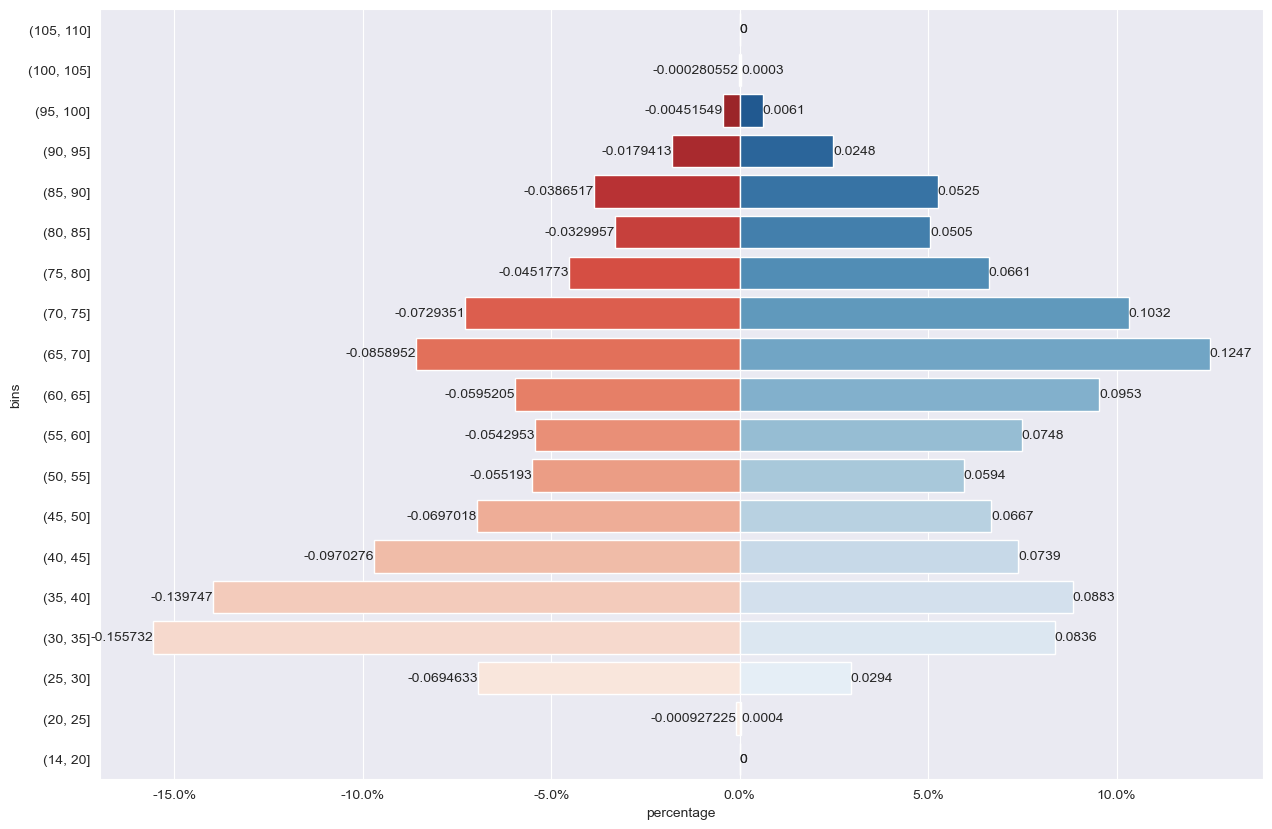

In [127]:
plt.clf()
# Set the figure style to "dark"
sns.set_style("darkgrid")

plt.figure(figsize=(15,10))
# if no clause below, there'll be warning"Glyph 8722 (\N{MINUS SIGN}) missing from current font."
plt.rc('axes', unicode_minus=False) 

#sns.set_palette(color_female)
g4 = sns.barplot(data=df_bins_female, y='bins', 
                 x=-df_bins_female['preportion'], 
                 order = df_bins_female['bins'].unique()[::-1],
                 palette=sns.color_palette("Reds_r",18))

g4 = sns.barplot(data=df_bins_male, y='bins', 
                 x=df_bins_male['percentage'].str.strip('%').astype(float)/100, 
                 order = df_bins_male['bins'].unique()[::-1],
                 palette=sns.color_palette('Blues_r',18))
# g4.set_xticklabels(step=2,rotation=40)
g4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=1))
g4.bar_label(g4.containers[0])
g4.bar_label(g4.containers[1])

plt.show()

# 5 Conclusion

1. There are 1,956,731 XXX members in Shanghai, the database is upto Dec. 2021.

2. There are two peaks in the number of party members based on their birth year, around 1954 and 1982, both exceeding 40,000.

3. The number of XXX members based on their birth year had a trough, in 1964, it was less than 20,000. There are also troughs before the 1940s and after the 1990s, but they were too old or too young, it could not be concluded that they were also troughs there.

4. There are far more male than female overall, 62.8% vs 37.2%. But there are more female than male before the age of 45.

In [128]:
!conda -V

conda 23.7.4
